In [1]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\jorgen\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
BINS=50

In [4]:
tokenizer1 = T5Tokenizer.from_pretrained("navjordj/t5-large-snl-2")

def tokenize(text):
    return tokenizer1(text).input_ids


In [19]:

dataset = load_dataset("navjordj/SNL_summarization")

data = dataset["train"]
df = data.to_pandas()

df["ingress_length"] = df["ingress"].str.len() 
df["article_length"] = df["article"].str.len() 

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_tokens"] = df["ingress"].apply(tokenize)
df["article_tokens"] = df["article"].apply(tokenize)

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_n_tokens"] = df["ingress_tokens"].apply(len)
df["article_n_tokens"] = df["article_tokens"].apply(len)

data1 = df["ingress_n_tokens"]
data2 = df["article_n_tokens"]


Using custom data configuration navjordj--SNL_summarization-d89e75929608302f
Found cached dataset parquet (C:/Users/jorgen/.cache/huggingface/datasets/navjordj___parquet/navjordj--SNL_summarization-d89e75929608302f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 48.75it/s]


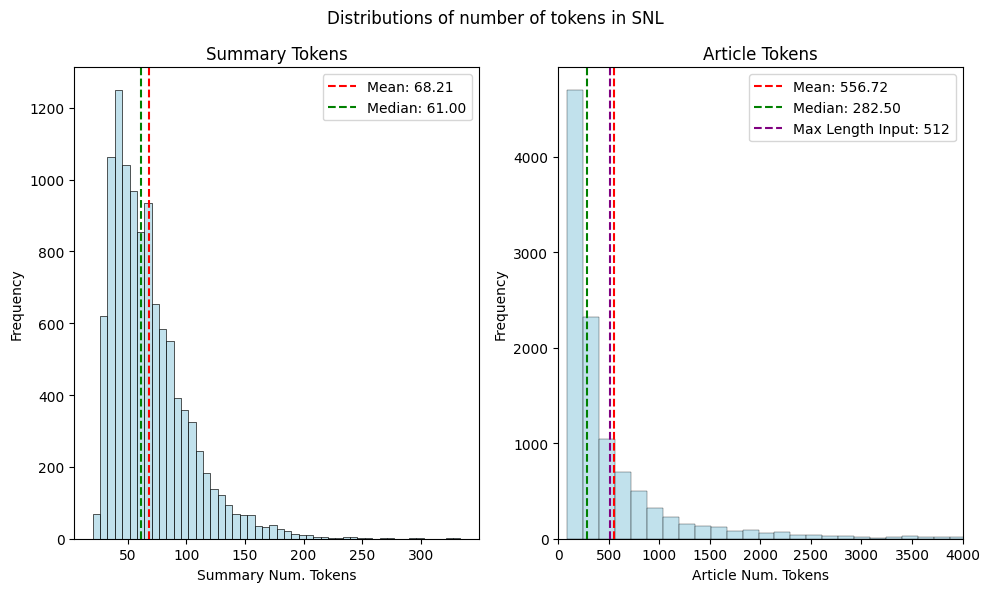

In [21]:

mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)

medians = [np.median(data) for data in [data1, data2]]
means = [np.mean(data) for data in [data1, data2]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Distributions of number of tokens in SNL")

hist_data = [data1, data2]
titles = ["Summary Tokens", "Article Tokens"]

for i, (data, mean, median, title) in enumerate(zip(hist_data, means, medians, titles)):
    row, col = divmod(i, 2)
    if i == 1:
        BINS = 100
    else:
        BINS = 50

    sns.histplot(ax=axes[i], data=data, bins=BINS, kde=False, color="lightblue")
    axes[i].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
    if "Tokens" in title:
        if "Article" in title:
            axes[i].axvline(512, color="purple", linestyle="--", label=f"Max Length Input: 512")
    axes[i].set_title(title)
    axes[i].legend()

# Set x and y axis labels
axes[0].set(xlabel="Summary Num. Tokens", ylabel="Frequency")
axes[1].set(xlabel="Article Num. Tokens", ylabel="Frequency", xlim=(0,4000))

plt.tight_layout()
plt.savefig(f"SNL_distribution.png")
plt.show()


In [22]:
dataset = load_dataset("jkorsvik/cnn_daily_mail_nor_final")

data = dataset["train"]
df = data.to_pandas()

df["ingress_length"] = df["highlights"].str.len() 
df["article_length"] = df["article"].str.len() 

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_tokens"] = df["highlights"].apply(tokenize)
df["article_tokens"] = df["article"].apply(tokenize)

# Add two columns to train_df with the number of characters in the ingress and article
df["ingress_n_tokens"] = df["ingress_tokens"].apply(len)
df["article_n_tokens"] = df["article_tokens"].apply(len)

data1 = df["ingress_n_tokens"]
data2 = df["article_n_tokens"]


Using custom data configuration jkorsvik--cnn_daily_mail_nor_final-829ec2425a22fa1d
Found cached dataset parquet (C:/Users/jorgen/.cache/huggingface/datasets/jkorsvik___parquet/jkorsvik--cnn_daily_mail_nor_final-829ec2425a22fa1d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 18.84it/s]


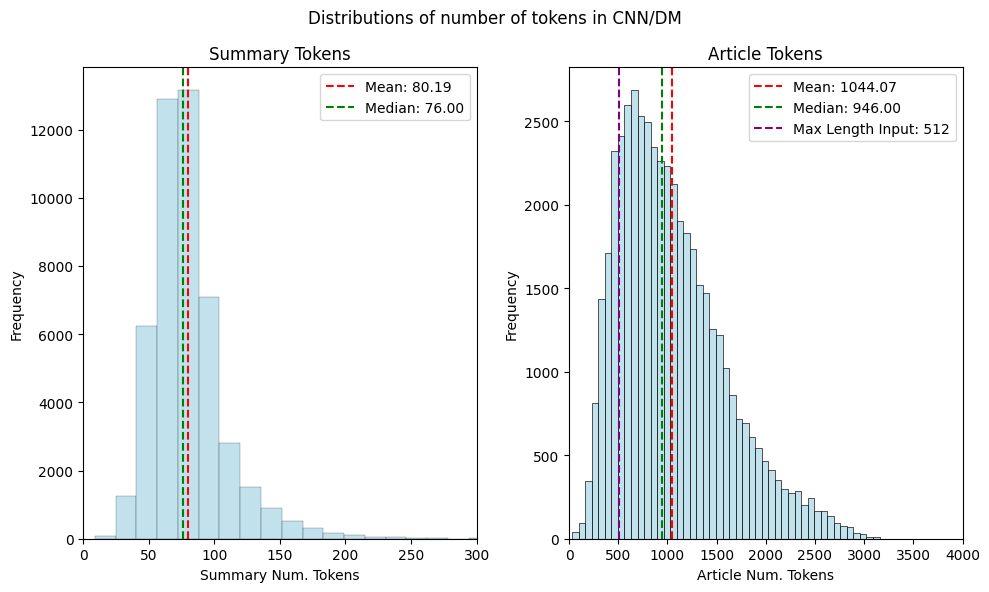

In [23]:


mean1, median1 = np.mean(data1), np.median(data1)
mean2, median2 = np.mean(data2), np.median(data2)

medians = [np.median(data) for data in [data1, data2]]
means = [np.mean(data) for data in [data1, data2]]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle("Distributions of number of tokens in CNN/DM")

hist_data = [data1, data2]
titles = ["Summary Tokens", "Article Tokens"]

for i, (data, mean, median, title) in enumerate(zip(hist_data, means, medians, titles)):
    row, col = divmod(i, 2)
    if i == 0:
        BINS = 150
    else:
        BINS = 50
    sns.histplot(ax=axes[i], data=data, bins=BINS, kde=False, color="lightblue")
    axes[i].axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
    axes[i].axvline(median, color="green", linestyle="--", label=f"Median: {median:.2f}")
    if "Tokens" in title:
        if "Article" in title:
            axes[i].axvline(512, color="purple", linestyle="--", label=f"Max Length Input: 512")
    axes[i].set_title(title)
    axes[i].legend()

# Set x and y axis labels
axes[0].set(xlabel="Summary Num. Tokens", ylabel="Frequency", xlim=(0,300))
axes[1].set(xlabel="Article Num. Tokens", ylabel="Frequency", xlim=(0,4000))

plt.tight_layout()
plt.savefig(f"CNNDM_distribution.png")
plt.show()
